# P7 : Détectez les Bad Buzz grâce au Deep Learning

## Traitement du contenu des tweets (pour modèle Keras simple optimisé et Keras simple optimisé avec couche LSTM )

In [1]:
import tensorflow as tf
tf.test.gpu_device_name ()

C:\Users\JK253\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JK253\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\JK253\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices ()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10935274113755420757
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4181524480
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14369819352095386145
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
import os
import pandas as pd
data = pd.read_csv('P7_03_fichiercsv_tweet_val_lab_mod.csv')
data.head()

,label,tweet,date_du_poste,utilisateur
0,0,is upset that he can't update his Facebook by ...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton
1,0,@Kenichan I dived many times for the ball. Man...,Mon Apr 06 22:19:53 PDT 2009,mattycus
2,0,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF
3,0,"@nationwideclass no, it's not behaving at all....",Mon Apr 06 22:19:57 PDT 2009,Karoli
4,0,@Kwesidei not the whole crew,Mon Apr 06 22:20:00 PDT 2009,joy_wolf


### Nuage de mots

In [4]:
from wordcloud import WordCloud, STOPWORDS

In [5]:
wordcloud = WordCloud(                      
    background_color='white',
    stopwords=STOPWORDS,
    max_words=200,
    max_font_size=40, 
    random_state=42).generate(str(data['tweet']))

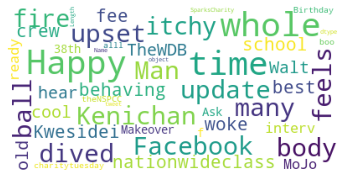

In [6]:
import matplotlib.pyplot as plt
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

Le nuage de mots est une très bonne technique de départ pour vérifier les mots qui apparaisse le plus souvent sur nos différents tweets, on constate que la langue utiliser est l’anglais et que ces tweets parle beaucoup du réseaux sociales Facebook.

## Nettoyage des tweets

In [7]:
#*****************************************
# Préparation des librairie et des outils
# pour le nettoyage des tweets
#*****************************************

# Expressions régulières
import re

# Pontuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)

# Tokénisation
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Lemmatisation
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

# Charger les stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
mots_vides = stopwords.words('english')
print('\n')
print(mots_vides)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'wh

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JK253\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# fonction pour nettoyage de chaque document
# tweet = corps du tweet = document
# ponctuations : liste des ponctuations
# stopwords : liste des stopwords à retirer
# lem : fonction pour la lemmatisation des termes

def clean_tweet(tweet, ponctuations, stopwords, lem):
    # Harmonisation de la casse
    temp = tweet.lower()
    # retier les contractions en anglais
    temp = re.sub("'", "", temp)
    # retrait des @
    temp = re.sub("@[A-Za-z0-9_]+", "", temp)
    # retrait des #
    temp = re.sub("#[A-Za-z0-9_]+", "", temp)
    # retrait des liens web (http et https)
    temp = re.sub(r'http\S+','', temp)
    # retrait des ponctuations
    temp = "".join([char for char in list(temp) if not (char in ponctuations)])
    # retrait des nombres
    temp = re.sub("[0-9]", "", temp)
    # tokénisation
    temp = word_tokenize(temp)
    # lemmatisation des termes
    temp = [lem.lemmatize(mot) for mot in temp]
    # retrait des stopwords
    temp = [mot for mot in temp if not mot in stopwords]
    # retirer les tokens de moins de 3 caractères
    temp = [mot for mot in temp if len(mot) >= 3]
    # reformer la chaîne
    temp = " ".join(mot for mot in temp)
    return temp

In [9]:
# Appliquer le nettoyage au corpus
corpus = list(data.tweet)
corpus = [clean_tweet(doc, ponctuations, mots_vides, lem) for doc in corpus]

In [10]:
corpus[0]

'upset cant update facebook texting might cry result school today also blah'

In [11]:
# Nouvelle dataframe
df = pd.DataFrame({'label': data.label,'tweet': corpus})
print("avant:.........")
data.head(10)

avant:.........


,label,tweet,date_du_poste,utilisateur
0,0,is upset that he can't update his Facebook by ...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton
1,0,@Kenichan I dived many times for the ball. Man...,Mon Apr 06 22:19:53 PDT 2009,mattycus
2,0,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF
3,0,"@nationwideclass no, it's not behaving at all....",Mon Apr 06 22:19:57 PDT 2009,Karoli
4,0,@Kwesidei not the whole crew,Mon Apr 06 22:20:00 PDT 2009,joy_wolf
5,0,Need a hug,Mon Apr 06 22:20:03 PDT 2009,mybirch
6,0,@LOLTrish hey long time no see! Yes.. Rains a...,Mon Apr 06 22:20:03 PDT 2009,coZZ
7,0,@Tatiana_K nope they didn't have it,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood
8,0,@twittera que me muera ?,Mon Apr 06 22:20:09 PDT 2009,mimismo
9,0,spring break in plain city... it's snowing,Mon Apr 06 22:20:16 PDT 2009,erinx3leannexo


In [12]:
print("après:.........")
df.head(10)

après:.........


,label,tweet
0,0,upset cant update facebook texting might cry r...
1,0,dived many time ball managed save rest bound
2,0,whole body feel itchy like fire
3,0,behaving mad cant see
4,0,whole crew
5,0,need hug
6,0,hey long time see yes rain bit bit lol fine th...
7,0,nope didnt
8,0,que muera
9,0,spring break plain city snowing


In [13]:
# des tweets vides après nettoyage?
print(df.loc[df.tweet==""].shape[0])

9236


In [14]:
# retrait des tweets correspondants
df_ok = df.loc[df.tweet != ""]
print(df_ok.shape)

(1590763, 2)


## Sauvegarder ma base de données nettoyé en fichier CSV

In [15]:
df_ok.to_csv (r'P7_03_fichiercsv_tweet_nettoyé.csv', index = False, header=True)

## Analyse des sentiments - Modélisation prédictive

### Subdivision apprentissage-test des données 

In [16]:
# partionner app-test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_ok, train_size=0.7, stratify=df_ok.label, random_state=0)

# vérification
print(data_train.shape)
print(data_test.shape)

(1113534, 2)
(477229, 2)


In [17]:
# version de keras
from tensorflow import keras
print(keras.__version__)

2.7.0


## Tokénisation avec Keras - Constitution du dictionnaire

In [18]:
# tokénisation avec keras
# num_words = None => sans limitation de termes à extraire
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=None)

# Création du dictionnaire à partir des documents de l'échantillon d'apprentissage
tk.fit_on_texts(data_train.tweet)

# nombre de documents traités
print(tk.document_count)

1113534


In [19]:
# taille du dictionnaire
dico_size = len(tk.word_counts)
print(dico_size)

319359


In [20]:
# liste des mots et leurs fréquences
print(list(tk.word_counts.items())[:10])

[('bernie', 32), ('fom', 12), ('dont', 47007), ('provide', 124), ('feed', 831), ('going', 44961), ('dinner', 5069), ('kimgary', 1), ('anything', 5671), ('want', 33782)]


In [21]:
# liste triée dans l'ordre de la fréquence décroissante
print(sorted(list(tk.word_counts.items()), key=lambda x: -x[1])[:10])

[('day', 73190), ('good', 62664), ('get', 60362), ('like', 55169), ('got', 48681), ('dont', 47007), ('love', 46769), ('work', 46462), ('today', 46073), ('going', 44961)]


In [22]:
# liste des termes avec leur indice - les 10 premiers
print(list(tk.word_counts.items())[:10])

[('bernie', 32), ('fom', 12), ('dont', 47007), ('provide', 124), ('feed', 831), ('going', 44961), ('dinner', 5069), ('kimgary', 1), ('anything', 5671), ('want', 33782)]


In [23]:
# les 10 derniers
print(list(tk.word_counts.items())[-10:])

[('mequotaaaaaaaaa', 1), ('brokenthen', 1), ('btwthat', 1), ('nightu', 1), ('quotsouper', 1), ('mealsquot', 1), ('farout', 1), ('foodrelated', 1), ('dingdongs', 1), ('gudmorningaftanoon', 1)]


### Documents = Séquence de tokens

In [24]:
# transformation des documents en séquences de tokens
seq_train = tk.texts_to_sequences(data_train.tweet)
print(seq_train[:3])

[[11376, 20609, 6, 4818, 1205], [10, 260, 94845], [224, 18, 19, 92, 20610]]


In [25]:
# tweet correspondence
print(data_train.tweet[:3])

20105            bernie fom dont provide feed
1522588                  going dinner kimgary
828421     anything want see life singaporean
Name: tweet, dtype: object


In [26]:
# vérification -bernie
print(list(tk.word_index.items())[11376-1])

('bernie', 11376)


In [27]:
# longueur max des documents dans l'échantillon train
import numpy
max_length = numpy.max(numpy.array([len(doc) for doc in seq_train]))
print(max_length)

33


In [28]:
# transformer en pad_sequences pour manipuler une structure de taille fixe
# maxlen = max_length + marge pour éventuellement gérer les documents plus longs en déploiement

# marge_length
marge_length = 5

from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_train = pad_sequences(seq_train, maxlen=max_length + marge_length, padding='post')

# les 3 premiers documents
print(pad_train[:3,:])

[[11376 20609     6  4818  1205     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   10   260 94845     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  224    18    19    92 20610     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]]


## Modélisation prédictive (1) - régularisation KERAS simple(optimisé)

In [29]:
# créer un modèle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, MaxPooling1D, Dropout 
# perception multicouche
#==> output_dim précise la taille de l'espace de représentation dans lequelle seront projetés les termes
#==> input_dim = dico_size + 1 à cause de l'index des termes commence à la colonne 1
#(la colonne 0 existe mais n'est pas associée à un  terme)
model_KSO = Sequential()
model_KSO.add(Embedding(input_dim = dico_size +1, output_dim = 10, input_length= max_length + marge_length))
# 2 opérations de régularisation 
model_KSO.add(MaxPooling1D(pool_size=5, strides=2))
model_KSO.add(Dropout(0.7))
# reprise du réseau habituel
model_KSO.add(Flatten())
model_KSO.add(Dense(units=1, activation="sigmoid"))

# structure du réseau
print(model_KSO.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 38, 10)            3193600   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 17, 10)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 17, 10)            0         
                                                                 
 flatten (Flatten)           (None, 170)               0         
                                                                 
 dense (Dense)               (None, 1)                 171       
                                                                 
Total params: 3,193,771
Trainable params: 3,193,771
Non-trainable params: 0
______________________________________________

In [30]:
# paramétre de l'algorithme d'apprentissage
model_KSO.compile(loss="binary_crossentropy", optimizer = "adam", metrics=['accuracy'])

# lancement - une partie du train est réservée pour la validation c'est à dire pour un suivi plus réaliste des performance
history_KSO = model_KSO.fit(pad_train, data_train.label, epochs=5,validation_split=0.2)

Epoch 1/5
27839/27839 [==============================] - 172s 6ms/step - loss: 0.5641 - accuracy: 0.7114 - val_loss: 0.5028 - val_accuracy: 0.7698
Epoch 2/5
27839/27839 [==============================] - 164s 6ms/step - loss: 0.5332 - accuracy: 0.7424 - val_loss: 0.4985 - val_accuracy: 0.7736
Epoch 3/5
27839/27839 [==============================] - 176s 6ms/step - loss: 0.5259 - accuracy: 0.7492 - val_loss: 0.4972 - val_accuracy: 0.7703
Epoch 4/5
27839/27839 [==============================] - 170s 6ms/step - loss: 0.5208 - accuracy: 0.7533 - val_loss: 0.4955 - val_accuracy: 0.7725
Epoch 5/5
27839/27839 [==============================] - 166s 6ms/step - loss: 0.5173 - accuracy: 0.7566 - val_loss: 0.4957 - val_accuracy: 0.7722


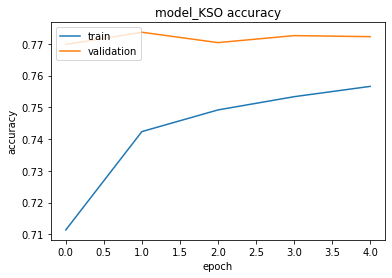

In [31]:
# graphique accuracy
import matplotlib.pyplot as plt

# fonction pour évaluation de l'accuracy
def graphique(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model_KSO accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc= 'upper left')
    plt.show()

# appel de la fonction
graphique(history_KSO)

### Word embedding - coordonnées des termes

In [32]:
# coordonnées des termes - dimension de la matrice
terms_coordo = model_KSO.get_weights()[0]
print(terms_coordo.shape)

(319360, 10)


## Modélisation prédictive (2) - en utilisant la couche LSTM

In [33]:
# autre
from tensorflow.keras.layers import MaxPooling1D, Dropout,LSTM
lstm_out = 128
# perception multicouche
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim = dico_size +1, output_dim = 10, input_length= max_length + marge_length))
# 2 opérations de régularisation 
model_LSTM.add(MaxPooling1D(pool_size=5, strides=2))
model_LSTM.add(Dropout(0.7))
# couche lstm
model_LSTM.add(LSTM(lstm_out))
#model_2.add(LSTM(128, return_sequences=True, input_dim=3, input_shape =(50,), activation= 'relu')) 
#model_2.add(LSTM(32, return_sequences=True))

#model_2.add(Dropout(0.2))

# reprise du réseau habituel
model_LSTM.add(Flatten())
model_LSTM.add(Dense(units=1, activation="sigmoid"))

# structure du réseau
print(model_LSTM.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 38, 10)            3193600   
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 17, 10)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 17, 10)            0         
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                      

In [34]:
# paramétre de l'algorithme d'apprentissage
model_LSTM.compile(loss="binary_crossentropy", optimizer = "adam", metrics=['accuracy'])

# lancement - une partie du train est réservée pour la validation c'est à dire pour un suivi plus réaliste des performance
history_LSTM = model_LSTM.fit(pad_train, data_train.label, epochs=5,validation_split=0.2)

Epoch 1/5
27839/27839 [==============================] - 277s 10ms/step - loss: 0.5327 - accuracy: 0.7322 - val_loss: 0.5157 - val_accuracy: 0.7498
Epoch 2/5
27839/27839 [==============================] - 275s 10ms/step - loss: 0.4901 - accuracy: 0.7653 - val_loss: 0.4884 - val_accuracy: 0.7718
Epoch 3/5
27839/27839 [==============================] - 279s 10ms/step - loss: 0.4709 - accuracy: 0.7799 - val_loss: 0.4909 - val_accuracy: 0.7688
Epoch 4/5
27839/27839 [==============================] - 277s 10ms/step - loss: 0.4581 - accuracy: 0.7884 - val_loss: 0.4976 - val_accuracy: 0.7605
Epoch 5/5
27839/27839 [==============================] - 278s 10ms/step - loss: 0.4480 - accuracy: 0.7946 - val_loss: 0.5078 - val_accuracy: 0.7585


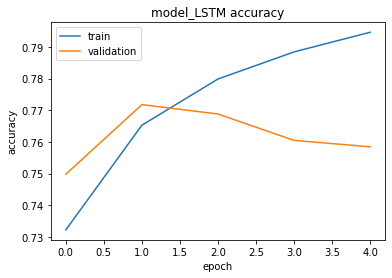

In [35]:
# graphique accuracy
import matplotlib.pyplot as plt

# fonction pour évaluation de l'accuracy
def graphique(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model_LSTM accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc= 'upper left')
    plt.show()

# appel de la fonction
graphique(history_LSTM)

## Evaluation sur l'échantillon test des 2 modèles(model_KSO et model_LSTM)

In [36]:
seq_test = tk.texts_to_sequences(data_test.tweet)
pad_test = pad_sequences(seq_test, maxlen= max_length + marge_length, padding='post')

# tweets
print(data_test.tweet[:3])

# vérification
print('\n')
print(pad_test[:3,:])

567941                                 okay meeting twitter
390271    really hard watch saturday morning infomercial...
331831                   finished watching marley sad movie
Name: tweet, dtype: object


[[  240   447    38     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   17   189   100   295    35 12220   152  2786     6    16   950   288
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  255    65  2831    43    99     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]]


In [37]:
# premier modèle(model_KSO) évaluation en test avec evaluate()
print(model_KSO.evaluate(pad_test, data_test.label))

14914/14914 [==============================] - 43s 3ms/step - loss: 0.4958 - accuracy: 0.7703
[0.4957602024078369, 0.7702842950820923]


In [38]:
# le second modèle (model_LSTM) avec couche lstm èvaluation en test avec evaluate()
print(model_LSTM.evaluate(pad_test, data_test.label))

14914/14914 [==============================] - 68s 5ms/step - loss: 0.5041 - accuracy: 0.7605
[0.5041378140449524, 0.7605300545692444]


## Déploiement sur un document supplémentaire

In [39]:
blog_avion = "My next plane ticket has just been booked! I fly in March to the Philippines. I am currently in the process of preparing for my next trip: what are the places I would like to discover, which itinerary to choose and in which cities to sleep, which domestic flights I will book to move between the islands etc. A trip by plane is an action that is anticipated and prepared a minimum. We can also face hazards, and it is important to know how to react. I indicate in this article various and varied tips on the theme of air travel. During the flight, the time may seem long, especially depending on the duration of your trip. Take something to take care of, and what not to be embarrassed (Quies balls can be useful). Also, feel free to get up from time to time if you need to stretch your legs. Be aware that the toilet is unavailable during take-off and landing, take precautions. A tip, always carry a photocopy of your passport, it can help in case of loss or theft that would occur during the trip. We also often talk about flight delay or cancellation. The wait seems endless in these cases, and travelers too often lack information. It is therefore necessary to try to take his evil in patience. Delayed plane, cancelled flight,companies like Indemnflight can help you get compensated. Note that the delay must be more than 3 hours for compensation to be possible. The advantage of going through Indemnflight is that experts take care of the administrative procedures for you, and they know the rights of passengers well. Note that they are paid only when the compensation is validated. You therefore delegate the management of the request, and then pay them in return a part of the compensation. I personally have only 2h30 maximum of delay to my credit, and have never tested the claim. Finally, the loss of luggage is also a thorny subject! If you do not find it at the exit of the plane, go to a counter available at the airport to report it and find a solution. The price of a plane ticket varies a lot depending on many factors. The level of demand, the time of year, the day and time of booking and the booking time before the departure date are very important elements to take into account if you have in mind to make a good deal when booking your flight. To learn more, I advise you to read this article from my travel blog: How to find a cheap plane ticket? Follow these 11 tips! When booking your flight, check that the formalities of entry into the desired country are feasible on time (example: a visa application must be made in advance), and that your identity card and/or passport will still be valid. Note that for many destinations, the passport must often be valid for a period of 6 months from the date of arrival. It is advisable to book flights well in advance. You rarely get a good deal when you buy a plane ticket a few days before departure. And in this case we take the risk of no longer having a place. In the case of my next trip to the Philippines, it is for these reasons that I will soon book the 2 domestic flights. Especially since I am going to travel with the national airline, and I have the impression that the weight of the luggage allowed is less than the 23 kg allowed on my international flight. I must therefore take this into account. Finally, it is necessary to pay attention to the information provided during the reservation. An error on the last name, or a time on the dates can be expensive, there is in this case a risk of paying extra to make this type of change, or even having to cancel your trip. First of all, find out a little in advance about how you will reach the airport (car + parking, bus, train...). When packing your suitcase, try to think of everything you will need on the spot. Also be aware that some products are prohibited in cabin baggage (liquid products greater than 100ml, knives etc.). Check the airline's website for an exhaustive list, and avoid having certain products confiscated. It is advisable to arrive 1h30 to 2h in advance for short or medium haul flight. 2h to 3h are recommended for international flights. This delay varies according to several elements: is your plane ticket ready or are you going to do the formalities at the airport? Do you have luggage to drop off at the counter? How big is the airport and in which area will you board? To help you and go further, discover the guide: practical tips for flying the first time: the steps to follow at the airport. Do you have any other tips to share when flying? Or adventures to share? Feel free to indicate them in the comments."

In [40]:
# nettoyage
my_clean = clean_tweet(blog_avion, ponctuations, mots_vides,lem)
print(my_clean)

next plane ticket booked fly march philippine currently process preparing next trip place would like discover itinerary choose city sleep domestic flight book move island etc trip plane action anticipated prepared minimum also face hazard important know react indicate article various varied tip theme air travel flight time may seem long especially depending duration trip take something take care embarrassed quies ball useful also feel free get time time need stretch leg aware toilet unavailable takeoff landing take precaution tip always carry photocopy passport help case loss theft would occur trip also often talk flight delay cancellation wait seems endless case traveler often lack information therefore necessary try take evil patience delayed plane cancelled flightcompanies like indemnflight help get compensated note delay must hour compensation possible advantage going indemnflight expert take care administrative procedure know right passenger well note paid compensation validated t

In [41]:
# transformation en séquence
my_seq = tk.texts_to_sequences([my_clean])
print(my_seq)

[[80, 793, 379, 2013, 744, 3110, 1809, 845, 1991, 1815, 80, 349, 258, 52, 4, 5080, 14446, 1761, 461, 48, 6477, 555, 247, 438, 1173, 1007, 349, 793, 1597, 11111, 2812, 6452, 168, 311, 16936, 1190, 16, 11752, 16150, 1073, 5236, 32304, 1086, 1609, 559, 1155, 555, 11, 220, 522, 91, 676, 5452, 24876, 349, 82, 116, 82, 383, 5839, 807, 2522, 168, 32, 246, 3, 11, 11, 26, 3948, 611, 3857, 2504, 6776, 17596, 5573, 82, 20262, 1086, 108, 2340, 24194, 3500, 132, 702, 1296, 10587, 52, 12012, 349, 168, 984, 212, 555, 2535, 9737, 66, 355, 5149, 702, 9705, 984, 1346, 2666, 3945, 4142, 162, 82, 1382, 3739, 1949, 793, 1037, 4, 132, 3, 31097, 709, 2535, 216, 72, 18692, 970, 3382, 10, 3787, 82, 383, 30661, 8140, 16, 47, 4371, 20, 709, 1046, 18692, 22095, 3945, 25536, 3233, 1592, 408, 1045, 344, 18692, 2731, 8366, 2535, 1461, 84, 5393, 3711, 140, 1296, 4350, 168, 318971, 2363, 111, 5375, 793, 4085, 1051, 674, 1093, 111, 2813, 1110, 793, 379, 26288, 112, 5452, 205, 4171, 1273, 3212, 11, 97, 1, 11, 4461, 4461

In [42]:
max_length = 33

In [43]:
# puis en pad
my_pad = pad_sequences(my_seq, maxlen= max_length + marge_length, padding='post')

In [44]:
# prédiction
pred = model_KSO.predict(my_pad)

In [45]:
def final_pred(pred):
    if(pred <0.5):
        print("Le tweet renvoi un sentiment nègatif")
    elif(pred >=0.5):
        print("Le tweet renvoi un sentiment positif")

In [46]:
final_pred(pred)

Le tweet renvoi un sentiment nègatif


## Enregistrement des 2 modèles Keras

In [47]:
model_KSO.save('../P7/P7_01_modèlesurmesure_avancé_keras_embedding')

INFO:tensorflow:Assets written to: ../P7/P7_01_modèlesurmesure_avancé_keras_embedding\assets


In [50]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [51]:
# sauvegarde pour déployer le modéle
model_KSO.save("avance_choisie.h5")

In [52]:
model_LSTM.save('../P7/P7_01_modèlesurmesure_avancé_keras_embedding_LSTM')

INFO:tensorflow:Assets written to: ../P7/P7_01_modèlesurmesure_avancé_keras_embedding_LSTM\assets


INFO:tensorflow:Assets written to: ../P7/P7_01_modèlesurmesure_avancé_keras_embedding_LSTM\assets
